# Gravity Survey Design & Corrections
----------------

Today's goals
* A bit more on survey design
* The (unfortunately boring) commonly applied corrections

# Survey Design
So all together when designing gravity surveys we must consider:
* How fast does the field change?
* Where should I place a base station?
* How often should I repeat at a base station?
* What order should I visit my stations?
* Do I need multiple base stations?

## Station Spacing
The sharpness of gravity anomalies you see are related to the depth of the density anomalies
* At a *minimum* you can observe the anomaly with a station spacing equal to the target depth.

In [90]:
def plot_samp(nx):
    
    x_loc1 = np.linspace(-100, 100, nx)
    print(x_loc1[1] - x_loc1[0])
    g_samp = sphere.gravitational_field(
        np.c_[x_loc1, np.zeros_like(x_loc1), np.zeros_like(x_loc1)]
    )[:, -1] * 1E8

    plt.plot(x, g_anom)
    plt.scatter(x_loc1, g_samp)

25.0


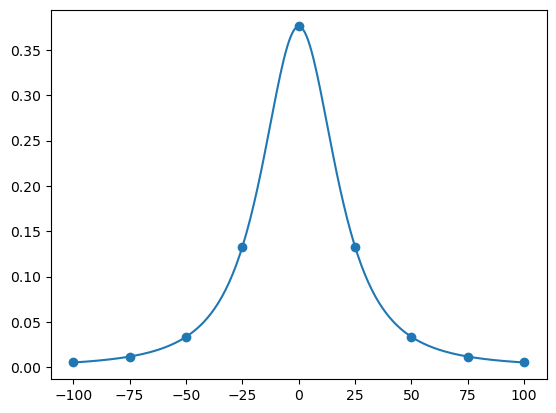

In [94]:
plot_samp(9)

Why might you want to sample more often?
* But there might be more items in your survey area than you would expect, so sampling more often is recommended

## Reference point
* Ideally, you're reference point is uneffected by your density anomaly
    * Pick somewhere reasonably away.
* But, you don't know what else could effect your reference point. 

## Looping
Fundamentally, gravity surveys are carried out in loops.
* You always loop back to the base station.

Consider these stations, and let's come up with a few valid ways to visit each of these stations:

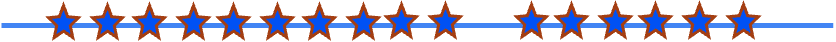

## Summary
When measuring gravity
* You must always create a closed loop visiting a base station
* You can use multiple base stations
* You can link multiple surveys together
* Think of your gravity survey like a chain link.

## Planning for lab on Thursday
Items to consider:

* How far from the tunnel do you want to measure?
* Do you want to keep the same spacing between every station?
* How many measurements can you take during the alloted time for lab?
* Where do you want to set up your survey?
* How accurate do you need to measure position?

# Corrections

### What's in my data?
To understand and interpret gravity data in exploration geophysics, we must first understand everything that is contributing to our measurements.  Specifically, the relevant questions one might ask include:
* When I put my gravity-meter on the ground, what are the total sources contributing to the measured data?
* Which components of my data are static, and which are time-varying?
* What components of the data do I want to keep, and what do I want to remove?

When I put my gravity-meter on the ground, what are the total sources contributing to the measured data?

For most cases in exploration geophysics, your gravity data are responding to the following combination of sources:

1) First-order approximation: field due to a sphere (spherical earth): $g_z = \gamma \frac{M}{R^2}$
1) Vertical gradient: distance from the center of the earth
1) Latitude variation: flattened rotating sphere
1) Geoid: internal density variations
1) Isostatic compensation:  variations in crustal thickness
1) Tidal effect: gravity fields due to the sun and moon
1) Other time-varying effects: (Atmospheric pressure, temperature, etc.)
1) Variations due to local geology


$$ g_{total} = g_{sphere} + g_{free-air} + g_{latitude} + g_{geoid} + g_{iso} + g_{drift} + g_{local}$$

The combined field variations (1-7)defines the “normal” field to be expected even in the absence of geological variations.

$$g_{background} = g_{sphere} + g_{free-air} + g_{latitude} + g_{geoid} + g_{iso} + g_{drift}$$

Further deviation from this “normal” field is our anomalous field, which constitutes the data of interest for most exploration cases, we want $g_{local}$.

$$g_{local} = g_{total} - g_{background} $$

**Gravity Anomaly**:
$$\Delta g = g_{total} - g_{background} $$

* The part of field that makes the measured gravity data different from the background field.
* This is the part produced by local geology--the interesting part in exploration geophysics.

## Source of anomaly in Gravity Exploration
* The difference between the true and assumed background density is called the density contrast.
* Since the gravity methods primarily work with anomalous fields, the source is considered to be the density contrasts.

Important:
* The anomaly and density contrast are relative concepts.
* Their definition depends on the scale of the problem.
* A variation in density of a given scale can be either part of the background or part of the anomalous density.

## Normal / Background Gravity Field
The variations due to common fields can completely mask your signal of interest!

![comparison](resources/gravity_before_after.png)

## Data Reductions
* With an understanding of the possible sources contributing to our data, let’s next outline how to remove the unwanted components.

* The goal is to extract the anomalous data of interest associated with local geology!

* What are the data we want to extract from the field observations? The part that is due to geological features we want to image!
* Must remove anything that is due to the global variation, instrument drift, or surface topography! 

-- Welcome to data reduction --

Components of an observed value:
1) $g_{sphere}$ Reference spheroid
1) $\Delta g_{latitude} \rightarrow$ Reference Spheroid $\rightarrow$ Lattitude correction
1) $\Delta g_{free-air} \rightarrow$ Effect due to vertical gradient $\rightarrow$ Free Air correction
1) $\Delta g_{eotvos} \rightarrow$ Moving platform $\rightarrow$ Eotvos correction
1) $\Delta g_{iso} \rightarrow$ Isostatic effects $\rightarrow$ Isostatic correction
1) $\Delta g_{drift} \rightarrow$ Tidal and instrument drift $\rightarrow$ Drift correction
1) $\Delta g_{B} \rightarrow$ Field due to background mass above sea level $\rightarrow$ Bouguer and Terrain correction
1) $\Delta g_{anomaly} \rightarrow$ Tidal and instrument drift $\rightarrow$ Drift correction

## Our Starting Model and Data
* Let’s demonstrate data reductions with a set of gravity data generated for a synthetic density model with a compact density source and some terrain!
    * Notice the correlation (or anti-correlation) between the terrain (elevation) and the initial observed gravity data.  There is also a large negative anomaly when it should all be positive.

![step0](resources/8-start.png)

## Latitude Correction
* Removing the reference field from the spheroid
* International Gravity Formula (IGRF) (spheroid)
    * closed form expression:
    $ g = g_e \frac{1 + k \sin^2\phi}{\sqrt{1 - \eta^2 \sin^2\phi}} $
        * $g_e = 978.03267714 mGal$
        * $k = 0.00193185138639$
        * $\eta^2 = 0.0069437999013$
        * $\phi$ - latitude
    * Or approximate:
      $g = g_e (1 + \alpha sin^2\phi + \beta \sin^4\phi)$

### Correction methods
* If absolute gravity is measured, the first correction would be to remove the field of reference spheroid, which accounts for the latitude variation.
* Currently, most surveys generate relative (or difference) measurements, thus we can only correct for the latitude variation.
* This term is commonly referred as latitude correction.
* Correction is done by computing the reference field but correct only for the change with the latitude
a practical approach: (using 1984 system)


![lat](resources/8-latitude.png)

## Free Air Correction
![false](resources/8-fa-example.png)

* Example of false anomaly: it’s a mirror image of the elevation curve (amplitude scaled).
* We apply a correction according to the elevation, and it basically compensates for the decrease in gravity field as the elevation h increases, in effect we are calculating the “normal field” due to the reference spheroid at radius (R+h).


* Assume we have absolute gravity data, we perform the correction by referencing to the ellipsoid, since the reference field we just removed is that of the ellipsoid.
* The correction for a point with elevation h is therefore given by:

$$ \Delta g_{fa} = -2 \frac{h}{R}g_0 \approx -0.3086 \frac{mGal}{m} h$$


* i.e., the free air gradient is -0.3086 mGal/m

* For relative gravity measurements, the reference field is implicitly removed (missing). The main concern is the false anomaly produced by elevation differences. A correction based on this difference Δh relative to a base station will suffice, but h is used customarily.

### Time & Drift Correction
...

### Eotvos Correction
* Correct for the alteration to the measurement due to the ship’s motion.
    * Differences in speed relative to spin of the earth
* Necessary for marine and airborne surveys.
* Need to have data for the speed and heading of the platform: 
* Eotvos correction is given by,
    $$\Delta g_{eotvos} = -2(\omega v \sin \lambda \cos \phi  + \frac{v^2}{R})$$
* For most surveys, v is very small, so only first term is needed:
* Eotvos correction is given by,
    $$\Delta g_{eotvos} \approx -2\omega v \sin \lambda \cos \phi$$

![eotvos](resources/8-eotvos.png)

### Isostatic Correction

Isostatic Effect
* The fact that geoid does not correlate with excess or deficient  mass distributions can only mean the following: 
    1) The excess mass is compensated by mass deficient at depth
    1) while deficient mass is compensated by excess mass below. 
* This is called isostatic compensation.
* The mechanism can be best understood by the model of a lighter material floating on top of a heavier “fluid”. 

Two models:
1) Airy’s model: varying depth extent
2) Pratt’s model: laterally varying density

![airy](resources/8-airy.png)

![pratt](resources/8-pratt.png)